# Knowing Dataset

In [1]:
# Import needed libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import bidi.algorithm
from bidi.algorithm import get_display
import arabic_reshaper
import jdatetime
# Load the data

df = pd.read_excel('cp-for-task.xlsx')
df.describe()

,Mobile Key,Person Birth Date,FirstAppInstallDate,Mobile Operator Id,Mobile SimCard Type Id,IsMerchant,TotalTrsApplication,TotalAmount,FirstTrsDate,LastTrsDate,...,CountChargeasDest,SuccessfullRatio,SuccessfullRatioExcC2C,AppErrorRatio,UserErrorRatio,BalanceErrorRatio,PaymentToolCardRatio,PaymentToolWalletRatio,PaymentToolTaliRatio,CMS_Balance
count,50000.000000,15579,50000,50000.000000,49597.000000,50000.0,20285.000000,2.028500e+04,2.028500e+04,2.028500e+04,...,13016.000000,21461.000000,19663.000000,21461.000000,21461.000000,21461.000000,20285.000000,20285.000000,20285.000000,9.340000e+03
mean,63710.034500,1982-11-14 14:31:21.455805824,2018-12-13 03:26:28.597302016,1.354580,1.263705,0.0,112.099482,4.733102e+08,1.401112e+07,1.401775e+07,...,13.752535,0.748779,0.769655,0.072712,0.035646,0.018635,0.937021,0.062040,0.000938,2.069254e+05
min,2.000000,1926-09-24 00:00:00,2014-12-01 21:45:03.027000,1.000000,1.000000,0.0,1.000000,0.000000e+00,1.401010e+07,1.401010e+07,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,33096.750000,1977-03-13 00:00:00,2017-08-08 22:13:58.562500096,1.000000,1.000000,0.0,6.000000,4.000000e+06,1.401010e+07,1.401121e+07,...,1.000000,0.680161,0.685714,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
50%,64329.000000,1984-10-22 00:00:00,2018-09-11 15:00:31.040000,1.000000,1.000000,0.0,41.000000,6.428000e+07,1.401013e+07,1.402042e+07,...,4.000000,0.830097,0.854838,0.015873,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
75%,95063.250000,1990-01-29 00:00:00,2020-08-16 08:26:59.817250048,2.000000,2.000000,0.0,153.000000,5.517271e+08,1.401061e+07,1.402050e+07,...,15.000000,0.910931,0.958333,0.065476,0.018587,0.008064,1.000000,0.000000,0.000000,9.500000e+04
max,125074.000000,2012-05-04 00:00:00,2023-07-24 17:37:55.923000,2.000000,2.000000,0.0,2548.000000,2.452428e+10,1.402050e+07,1.402050e+07,...,518.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.558500e+07
std,36134.249738,NaN,NaN,0.478391,0.440646,0.0,170.979340,9.501309e+08,2.722882e+03,4.333718e+03,...,24.940581,0.256221,0.261442,0.159385,0.114702,0.072512,0.201744,0.200534,0.021943,9.211199e+05


# Convert Iran Date to Universal

In [2]:
# Convert integer date format to string date format
df['FirstTrsDate'] = df['FirstTrsDate'].apply(lambda x: str(int(x)) if not np.isnan(x) else 'nan')
df['LastTrsDate'] = df['LastTrsDate'].apply(lambda x: str(int(x)) if not np.isnan(x) else 'nan')

# Function to convert Jalali date string to Gregorian datetime
def convert_jalali_to_gregorian(date_str):
    if pd.notnull(date_str):
        try:
            # Extract year, month, day from the string
            year = int(date_str[:4])
            month = int(date_str[4:6])
            day = int(date_str[6:8])
            # Convert Jalali date to Gregorian date
            gregorian_date = jdatetime.date(year, month, day).togregorian()
            return pd.to_datetime(gregorian_date)
        except ValueError:
            return pd.NaT
    return pd.NaT

# Apply the conversion function to the relevant columns
df['FirstTrsDate_Gregorian'] = df['FirstTrsDate'].apply(convert_jalali_to_gregorian)
df['LastTrsDate_Gregorian'] = df['LastTrsDate'].apply(convert_jalali_to_gregorian)

# Display the DataFrame
df.head()


,Mobile Key,Person Is Alive,Person Birth Date,Person Gender Title,Person First Name,Person Last Name,Mobile Number Encrypt,Mobile Number Masked,FirstAppInstallDate,Mobile Operator Id,...,FirstProvince,SecondProvince,FirstRegion,SecondRegion,FirstGuild,SecondGuild,ThirdGuild,AllGuild,FirstTrsDate_Gregorian,LastTrsDate_Gregorian
0,2,True,1997-10-09,مرد,مجید,ملکی,HN8x8N88m+sikOUIs4Iuxg==,0938***0926,2017-04-18 20:15:22.910,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27,2023-06-16
1,4,NaN,NaT,NaN,NaN,NaN,/Y38H9ETC2tMantBTYBQzw==,0913***9963,2014-12-15 21:59:03.870,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,6,NaN,NaT,NaN,NaN,NaN,ThuZBrT+/BueLw7LxSX15w==,0919***0132,2016-04-18 10:15:01.480,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,7,True,1979-07-13,مرد,حمیدرضا,عزیزی مربویه,0sEbFPeIKs9cCJLA73cOoQ==,0917***4959,2020-01-13 23:07:15.570,1,...,فارس,فارس,شيراز,شيراز,5411,"5499,5311",5811,"5411,5441,7538,5533,5462,8062,5533,5411,5814,7...",2022-03-21,2023-07-23
4,9,True,1979-03-11,مرد,امیدعلی,احمدپور,FZT2oVrc5UCFaN8gjELmCg==,0917***8979,2016-11-22 22:03:27.060,1,...,فارس,فارس,مرودشت,شيراز,5411,5251,5411,"1731,5261,5411,5812,5065,5065,5814,5441,5411,8...",2022-03-21,2023-07-23


## Customer Lifetime Value (CLTV) 
CLV is a crucial metric that estimates the total revenue a business can reasonably expect from an average customer.

In [3]:
import locale

# Calculating the average transaction value
avg_transaction_value = df['TotalAmount'].mean()

# Calculating the purchase frequency rate
purchase_frequency_rate = df['TotalAmount'].count() / len(df)

# Average lifespan of Customers
df['FirstTrsDate_Gregorian'] = pd.to_datetime(df['FirstTrsDate_Gregorian'])
df['LastTrsDate_Gregorian'] = pd.to_datetime(df['LastTrsDate_Gregorian'])
df['Lifespan'] = df['LastTrsDate_Gregorian'] - df['FirstTrsDate_Gregorian']

# Calculate the average lifespan of customers in days
average_lifespan_days = df['Lifespan'].mean().days

# CLTV calculation
cltv = round(avg_transaction_value * purchase_frequency_rate * average_lifespan_days)

formatted_cltv = "{:,}".format(cltv)

print("Customer Lifetime Value (CLTV):", formatted_cltv, "Rial")

Customer Lifetime Value (CLTV): 56,070,412,463 Rial


## Churn Rate & User Share
User Share is percentage of active users (users who are not churned)

In [4]:
# Set current_date to the last date in the dataset
current_date = df['LastTrsDate_Gregorian'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate_Gregorian']).dt.days

# Define churn: Recency > 90 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# Calculate churn rate
churn_rate = df['Churn'].mean() * 100

# Calculate user share
total_users = len(df)
total_active_users = df[~df['Churn']].shape[0]
user_share = total_active_users / total_users * 100


print(f"User Share: {user_share:.2f}%")
print("Churn Rate:", churn_rate, "%")

User Share: 82.65%
Churn Rate: 17.354 %


## Average Value Of Users

In [5]:
# Average Value of Users calculation
avg_value_users = int(df['TotalAmount'].mean())

formatted_avg_value_users = "{:,}".format(avg_value_users)

print("Average Value of Users:", formatted_avg_value_users, 'Rials')

Average Value of Users: 473,310,230 Rials


## Average Use of App

In [6]:
# Average Use of App calculation
avg_use_app = df['TotalTrsApplication'].mean()

# Average Use of App per Day calculation
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate'])
df['AppUsageDays'] = (df['LastTrsDate_Gregorian'] - df['FirstAppInstallDate']).dt.days
df['AppUsageDays'] = df['AppUsageDays'].fillna(0).replace(0, 1)  # Replace 0 with 1 to avoid division by zero

avg_use_app_per_day = (df['TotalTrsApplication'] / df['AppUsageDays']).mean()

monthly_use_app = avg_use_app_per_day * 30

print("Average User Use of App:", round(avg_use_app))
print("Monthly Use of App:", round(monthly_use_app))
print("Average Use of App Per Day:", avg_use_app_per_day)

Average User Use of App: 112
Monthly Use of App: 3
Average Use of App Per Day: 0.08504451093062124


## Days users use app the most

In [7]:
# Extract day of the month
df['Day'] = pd.to_datetime(df['LastTrsDate_Gregorian']).dt.day

# Count occurrences of each day
day_counts = df['Day'].value_counts()

# Get top 5 days with the highest counts
top_days = day_counts.head(5)

print("Top 5 days users use the app the most:")
print(top_days)

Top 5 days users use the app the most:
Day
24.0    3856
23.0    2140
22.0    1071
21.0    1056
20.0     909
Name: count, dtype: int64


## Comparing TotalAmount with SuccessfullRatio or AppErrorRatio

In [8]:
# Comparing TotalAmount with SuccessfullRatio or AppErrorRatio
comparison_df = df[['TotalAmount', 'SuccessfullRatio', 'AppErrorRatio']].corr()

print("Comparison of TotalAmount with SuccessfullRatio and AppErrorRatio:\n", comparison_df)

Comparison of TotalAmount with SuccessfullRatio and AppErrorRatio:
                   TotalAmount  SuccessfullRatio  AppErrorRatio
TotalAmount          1.000000          0.139192      -0.164593
SuccessfullRatio     0.139192          1.000000      -0.520458
AppErrorRatio       -0.164593         -0.520458       1.000000


There is a strong negative correlation (-0.524491) between TotalAmount and AppErrorRatio. This means that as the TotalAmount increases, the AppErrorRatio tends to decrease significantly. In other words, higher total amounts are associated with lower error ratios.

## Average Revenue Per User (ARPU)
It's a key metric that measures the average revenue generated from each user over a specific period.

In [9]:
# Calculate total revenue and total users
total_revenue = df['TotalAmount'].sum()
total_users = len(df)

# Calculate ARPU
arpu = round(total_revenue / total_users)

formatted_arpu = "{:,}".format(arpu)


print("ARPU:", formatted_arpu, 'rials')

ARPU: 192,021,960 rials


# Cohort Analysis

In [10]:
# Remove hours from FirstAppInstallDate
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate']).dt.date

# Extract year and quarter for cohort analysis
df['CohortYear'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Y')
df['CohortQuarter'] = pd.to_datetime(df['FirstAppInstallDate']).dt.to_period('Q')

# Split ServiceUsage into individual services
df = df.assign(ServiceUsage=df['ServiceUsage'].str.split(',')).explode('ServiceUsage')
df['ServiceUsage'] = df['ServiceUsage'].str.strip()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


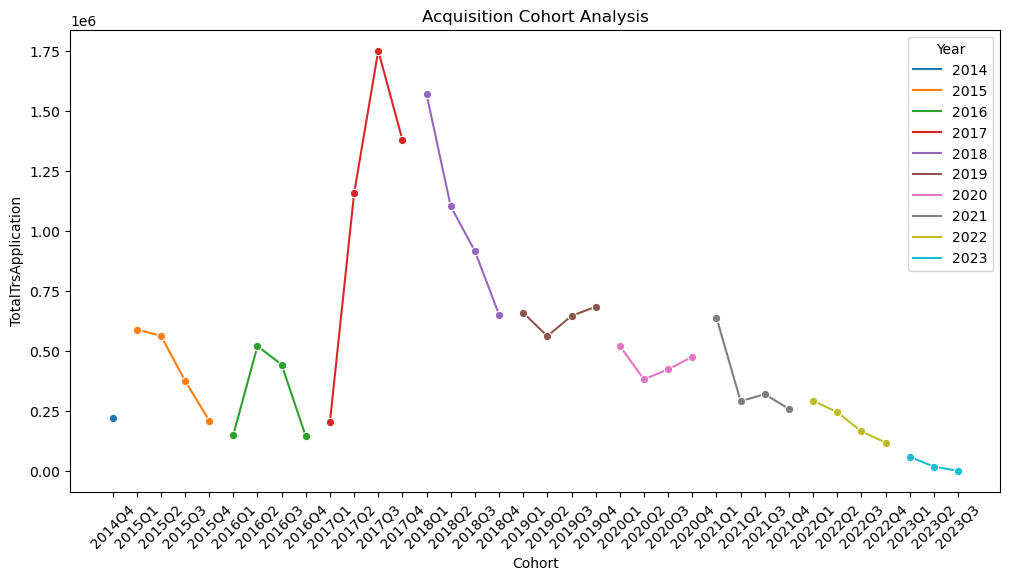

In [11]:
# Convert FirstAppInstallDate to datetime and extract year and quarter
df['FirstAppInstallDate'] = pd.to_datetime(df['FirstAppInstallDate'])
df['FirstAppInstallYear'] = df['FirstAppInstallDate'].dt.year
df['FirstAppInstallQuarter'] = df['FirstAppInstallDate'].dt.quarter

# Create a cohort identifier
df['Cohort'] = df['FirstAppInstallYear'].astype(str) + 'Q' + df['FirstAppInstallQuarter'].astype(str)
xlab = 'Q' + df['FirstAppInstallQuarter'].astype(str)
# Calculate metrics for each cohort
cohort_data = df.groupby('Cohort').agg({
    'TotalTrsApplication': 'sum',
    'TotalAmount': 'sum',
    'Mobile Number Encrypt': 'count'
}).rename(columns={'Mobile Number Encrypt': 'UserCount'})

# Visualization with x-axis duplicate years removed and y-axis grid added
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_data, x=cohort_data.index, y='TotalTrsApplication', hue=cohort_data.index.str[:4], marker='o', palette='tab10')
plt.title('Acquisition Cohort Analysis')
plt.legend(title='Year')
plt.xticks(rotation=45)


plt.show()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


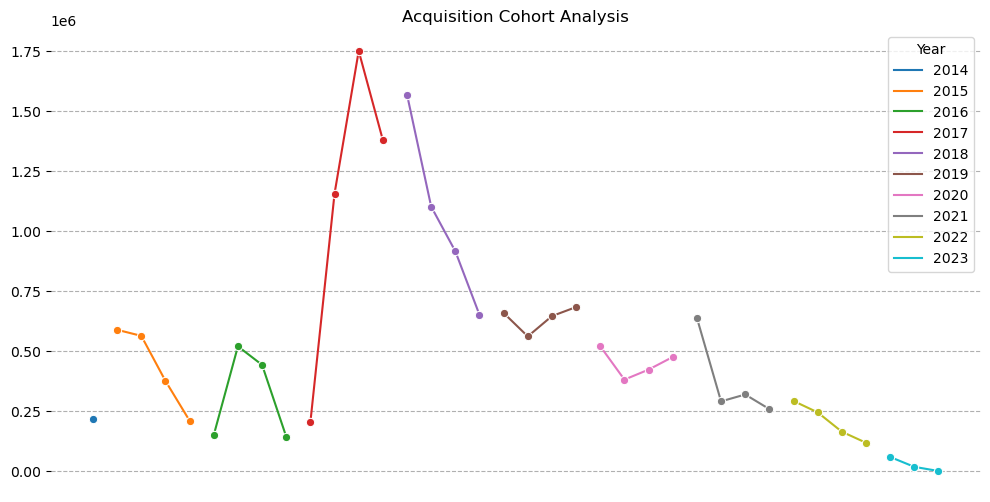

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization with only y-axis data displayed and y-axis grid added
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_data, x=cohort_data.index, y='TotalTrsApplication', hue=cohort_data.index.str[:4], marker='o', palette='tab10')
plt.legend(title='Year')
plt.xticks(rotation=45)

# Remove x-axis values and labels
plt.gca().set_xlabel('')
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Remove figure frame, y label, and axes titles
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_ylabel('')
plt.title('Acquisition Cohort Analysis')
plt.gca().grid(axis='y', linestyle='--')

plt.show()


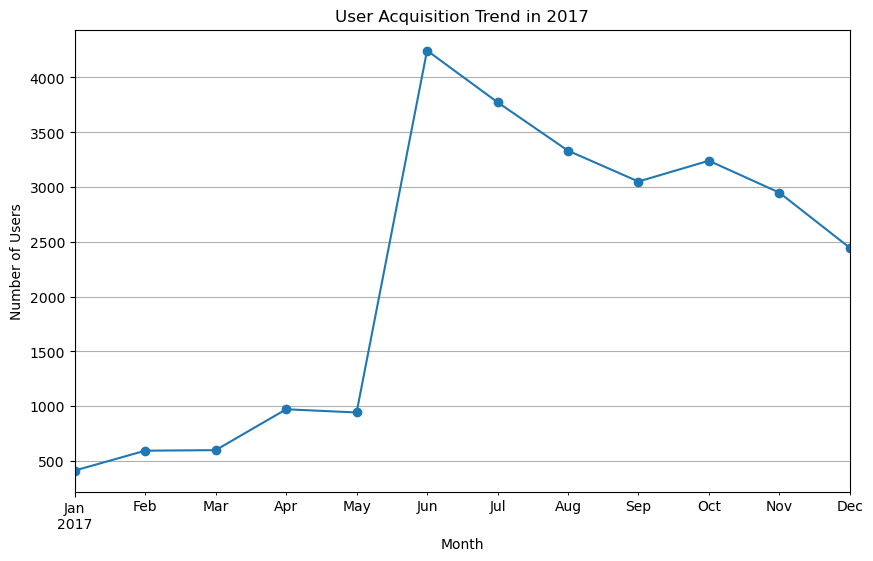

In [15]:
# Step 1: Filter the data for the year 2017
df_2017 = df[df['FirstAppInstallDate'].dt.year == 2017]

# Step 2: Group by 'ServiceUsage' and count occurrences
service_counts_2017 = df_2017.groupby('ServiceUsage').size()

# Aggregate user acquisition by month in 2017
monthly_acquisition = df_2017.resample('M', on='FirstAppInstallDate').size()

# Plot the monthly acquisition trend
plt.figure(figsize=(10, 6))
monthly_acquisition.plot(kind='line', marker='o')
plt.title('User Acquisition Trend in 2017')
plt.ylabel('Number of Users')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [16]:
# Filter data for the time range from May 1, 2017, to June 30, 2017
df_filtered = df[(df['FirstAppInstallDate'] >= '2017-05-01') & (df['FirstAppInstallDate'] <= '2017-06-30')]

# Ensure ServiceUsage is properly split into individual services if not already done
df_filtered = df_filtered.assign(ServiceUsage=df_filtered['ServiceUsage'].str.split(',')).explode('ServiceUsage')
df_filtered['ServiceUsage'] = df_filtered['ServiceUsage'].str.strip()

# Find the first date each service was used within the filtered data
first_service_usage = df_filtered.groupby('ServiceUsage')['FirstAppInstallDate'].min().reset_index()

# Display the services and their first usage dates during the specified time period
print(first_service_usage)

           ServiceUsage FirstAppInstallDate
0             AnnualTax          2017-06-17
1               Balance          2017-05-02
2               BillGas          2017-05-02
3            BillMobile          2017-05-02
4         BillMunicipal          2017-06-09
5             BillOther          2017-05-02
6             BillPhone          2017-05-02
7             BillPower          2017-05-02
8             BillWater          2017-05-02
9                   Bus          2017-05-02
10       BusTrainReturn          2017-05-02
11                  C2C          2017-05-02
12      CarFinesInquiry          2017-05-02
13      CarFinesPayment          2017-05-02
14          ChargeAptel          2017-06-21
15            ChargeMCI          2017-05-02
16            ChargeMTN          2017-05-02
17        ChargeRightel          2017-05-02
18         ChargeShatel          2017-05-13
19              Charity          2017-05-03
20       DomesticFlight          2017-05-10
21                  ETC         

In [17]:
# Filter data for the time range from May 1, 2017, to June 30, 2017
df_filtered = df[(df['FirstAppInstallDate'] >= '2017-05-01') & (df['FirstAppInstallDate'] <= '2017-06-30')]

# Ensure ServiceUsage is properly split into individual services
df_filtered = df_filtered.assign(ServiceUsage=df_filtered['ServiceUsage'].str.split(',')).explode('ServiceUsage')
df_filtered['ServiceUsage'] = df_filtered['ServiceUsage'].str.strip()

# Count the number of times each service was used during the specified time period
service_usage_counts = df_filtered['ServiceUsage'].value_counts().reset_index()
service_usage_counts.columns = ['ServiceUsage', 'UsageCount']

# Get the top 10 most used services
top_10_services = service_usage_counts.head(10)

print(top_10_services)

  ServiceUsage  UsageCount
0          C2C         481
1    ChargeMCI         355
2    ChargeMTN         345
3    BillPower         306
4   BillMobile         273
5      Balance         259
6    BillPhone         258
7  InternetMTN         240
8    BillWater         223
9  InternetMCI         221


# User Segmentation

## RFM

In [18]:
# Set current_date to the last date in the dataset
current_date = df['LastTrsDate_Gregorian'].max()

# Calculate Recency (days since last transaction)
df['Recency'] = (current_date - df['LastTrsDate_Gregorian']).dt.days

# Calculate Frequency (total number of transactions)
frequency_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

df['Frequency'] = df[frequency_columns].sum(axis=1)

# Calculate Monetary (total amount spent)
monetary_columns = [
    'TotalAmountPos', 'AmountC2C', 'CMS_Balance', 'AmountCharge',
    'AmountInternet', 'AmountBill', 'AmountETC', 'AmountCarFinesInq', 'AmountTraffic',
    'AmountDFlight', 'AmountTrain', 'AmountBus', 'AmountC2CasDest'
]

df['Monetary'] = df[monetary_columns].sum(axis=1)

# Define churn: Recency > 30 days
churn_threshold = 30
df['Churn'] = df['Recency'] > churn_threshold

# RFM Segmentation
quantiles = df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

def rfm_segmentation(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

df['R'] = df['Recency'].apply(rfm_segmentation, args=('Recency', quantiles))
df['F'] = df['Frequency'].apply(rfm_segmentation, args=('Frequency', quantiles))
df['M'] = df['Monetary'].apply(rfm_segmentation, args=('Monetary', quantiles))

# RFM Score
df['RFM_Score'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

# User Segments
def user_segment(row):
    if row['Churn']:
        return 'Churned'
    elif row['RFM_Score'] == '111':
        return 'Best Customers'
    elif row['R'] == 1 and row['F'] == 1:
        return 'Loyal Customers'
    elif row['R'] == 4:
        return 'At Risk'
    elif row['F'] == 4:
        return 'High Frequency'
    elif row['M'] == 4:
        return 'Big Spenders'
    else:
        return 'Others'

df['Segment'] = df.apply(user_segment, axis=1)

# Services interaction
services_columns = [
    'TotalTrsPos', 'CountC2C', 'CountBalance', 'CountPichak', 'CountCharge',
    'CountInternet', 'CountBill', 'CountETC', 'CountCarFinesInq', 'CountTraffic',
    'CountDFlight', 'CountTrain', 'CountBus', 'CountDestCardC2C'
]

# Calculate least and most interacted services
df['Least_Interacted_Service'] = df[services_columns].idxmin(axis=1)
df['Most_Interacted_Service'] = df[services_columns].idxmax(axis=1)

# Display the segments
segments_summary = df['Segment'].value_counts()
print("User Segments Summary:\n", segments_summary)

User Segments Summary:
 Segment
Others             39251
High Frequency     31201
At Risk            29715
Churned            25507
Big Spenders        6455
Best Customers        66
Loyal Customers       39
Name: count, dtype: int64


C:\Users\xre22\AppData\Local\Temp\ipykernel_12972\2991143449.py:76: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Least_Interacted_Service'] = df[services_columns].idxmin(axis=1)
C:\Users\xre22\AppData\Local\Temp\ipykernel_12972\2991143449.py:77: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['Most_Interacted_Service'] = df[services_columns].idxmax(axis=1)


## User Segmentation Distribution

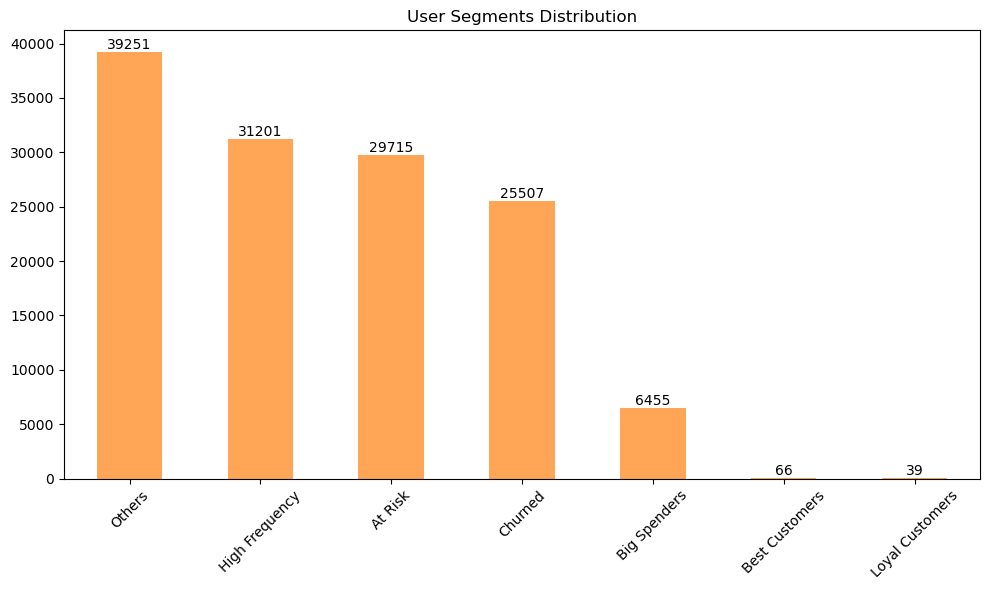

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'segments_summary' is a DataFrame or Series containing segment data

# Visualization of Segments
plt.figure(figsize=(10, 6))
segments_summary.plot(kind='bar', color='tab:orange', alpha=0.7)  # Use 'tab:orange' color
plt.title('User Segments Distribution')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, v in enumerate(segments_summary):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


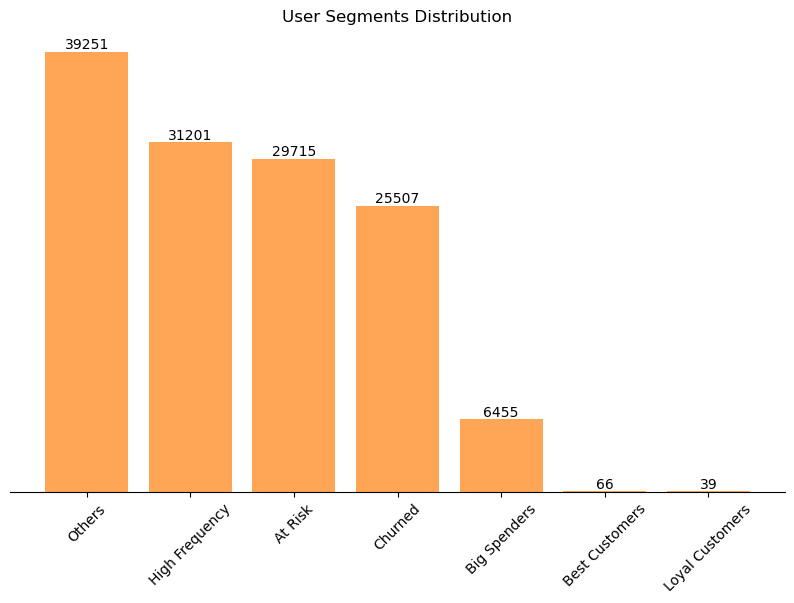

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'segments_summary' is a DataFrame or Series containing segment data

# Visualization of Segments
plt.figure(figsize=(10, 6))
bars = plt.bar(segments_summary.index, segments_summary, color='tab:orange', alpha=0.7)  # Use 'tab:orange' color

# Fading color as bars get shorter
for bar in bars:
    bar.set_facecolor((bar.get_facecolor()[:3] + (0.5,)))  # Fade the color by reducing alpha value

plt.title('User Segments Distribution')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove y-axis labels
plt.gca().set_yticklabels([])

# Remove y-axis ticks
plt.gca().tick_params(axis='y', which='both', left=False)

# Add labels to the bars
for i, v in enumerate(segments_summary):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


### Explanation of Segments and Their Usage:

In [21]:
explanations = {
    'Best Customers': "These users have high recency, frequency, and monetary scores. They are the most valuable customers.",
    'Loyal Customers': "These users have high recency and frequency scores but not necessarily high monetary scores. They are loyal and frequently use the app.",
    'At Risk': "These users have low recency scores, meaning they haven't transacted recently and are at risk of churning.",
    'High Frequency': "These users have high frequency scores, indicating they transact often but may not spend much per transaction.",
    'Big Spenders': "These users have high monetary scores, indicating they spend a lot per transaction.",
    'Churned': "These users have not transacted in the last 30 days and are considered churned.",
    'Others': "These users do not fit into any of the above categories and have mixed scores."
}

print("\nExplanation of Segments and Their Usage:\n")
for segment, explanation in explanations.items():
    print(f"{segment}: {explanation}\n")



Explanation of Segments and Their Usage:

Best Customers: These users have high recency, frequency, and monetary scores. They are the most valuable customers.

Loyal Customers: These users have high recency and frequency scores but not necessarily high monetary scores. They are loyal and frequently use the app.

At Risk: These users have low recency scores, meaning they haven't transacted recently and are at risk of churning.

High Frequency: These users have high frequency scores, indicating they transact often but may not spend much per transaction.

Big Spenders: These users have high monetary scores, indicating they spend a lot per transaction.

Churned: These users have not transacted in the last 30 days and are considered churned.

Others: These users do not fit into any of the above categories and have mixed scores.



### Overview  Of Segmentation

In [22]:
df[['Mobile Key', 'Frequency', 'Monetary', 'RFM_Score', 'Segment', 'Least_Interacted_Service', 'Most_Interacted_Service']]

,Mobile Key,Frequency,Monetary,RFM_Score,Segment,Least_Interacted_Service,Most_Interacted_Service
0,2,18.0,8131250.0,422,Churned,CountPichak,CountBill
0,2,18.0,8131250.0,422,Churned,CountPichak,CountBill
0,2,18.0,8131250.0,422,Churned,CountPichak,CountBill
0,2,18.0,8131250.0,422,Churned,CountPichak,CountBill
0,2,18.0,8131250.0,422,Churned,CountPichak,CountBill
...,...,...,...,...,...,...,...
49996,125068,109.0,481334990.0,333,Others,CountBalance,TotalTrsPos
49996,125068,109.0,481334990.0,333,Others,CountBalance,TotalTrsPos
49997,125071,0.0,0.0,411,At Risk,NaN,NaN
49998,125072,0.0,0.0,411,At Risk,NaN,NaN


# Discount Suggestion For Individuals

In [23]:
# Calculate potential profit for each least interacted service
profit_margin = 0.09

# Get unique least interacted services, excluding NaN values
unique_services = df['Least_Interacted_Service'].dropna().unique()

# Initialize an empty DataFrame to store discount suggestions
discount_suggestions = pd.DataFrame(columns=['Service', 'Potential_Profit', 'Suggested_Discount'])

# Calculate the potential profit if a user starts using the least interacted service
for service in unique_services:
    users = df[df['Least_Interacted_Service'] == service]
    if service in users.columns:
        potential_profit = users[service].sum() * profit_margin
        # Assume a discount that gives the company 5% profit margin on these services instead of 9%
        suggested_discount = (potential_profit / users.shape[0]) * (4/9)  # Discount to reduce profit margin from 9% to 5%
        new_row = pd.DataFrame({
            'Service': [service],
            'Potential_Profit': [potential_profit],
            'Suggested_Discount': [suggested_discount]
        })
        discount_suggestions = pd.concat([discount_suggestions, new_row], ignore_index=True)

# Display the discount suggestions
print("Discount Suggestions for Least Interacted Services:\n", discount_suggestions)

Discount Suggestions for Least Interacted Services:
              Service  Potential_Profit  Suggested_Discount
0        CountPichak           1466.10            0.092834
1           CountETC           1349.37            0.074825
2      CountInternet           3236.13            0.117019
3       CountBalance           3859.74            0.086963
4        TotalTrsPos          26453.70            1.714127
5          CountBill           4239.27            0.156631
6           CountC2C            856.53            0.065085
7        CountCharge           3403.26            0.129135
8       CountTraffic            206.37            0.047012
9   CountDestCardC2C           3068.01            0.190708
10        CountTrain            113.13            0.058329
11  CountCarFinesInq           1597.68            0.064564
12          CountBus            181.53            0.059807
13      CountDFlight             78.12            0.057674


C:\Users\xre22\AppData\Local\Temp\ipykernel_12972\1215435587.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  discount_suggestions = pd.concat([discount_suggestions, new_row], ignore_index=True)


# Services Analyze

## 1. Services

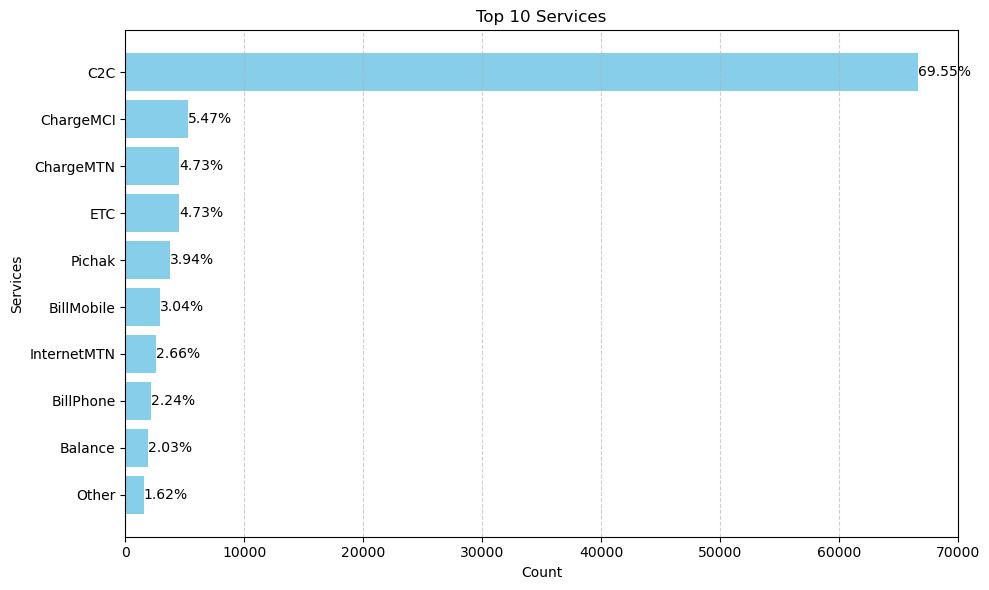

In [24]:
# Split comma-separated values and expand to DataFrame
exploded = df['TopService'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['Services', 'count']

# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Calculate percentages
total_count = top_10_counts['count'].sum()
top_10_counts['percentage'] = (top_10_counts['count'] / total_count) * 100

# Create a horizontal bar chart with percentage annotations
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_counts['Services'], top_10_counts['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Services')
plt.title('Top 10 Services')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add percentage annotations to each bar
for bar, percentage in zip(bars, top_10_counts['percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


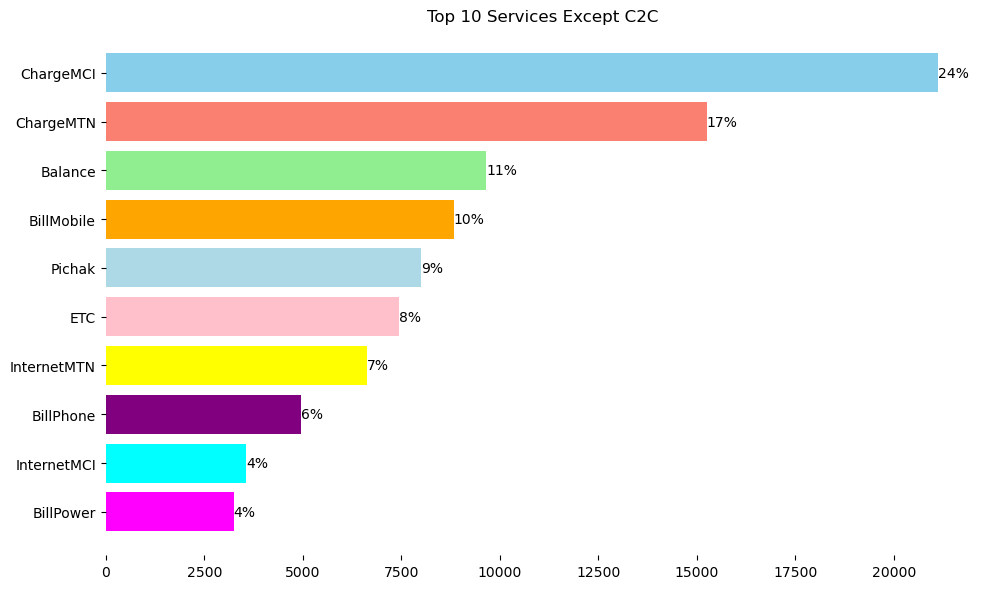

In [25]:
# Split comma-separated values and expand to DataFrame
exploded = df['TopServiceExC2C'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['Services', 'count']

# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Calculate percentage for each bar
total_count = top_10_counts['count'].sum()
top_10_counts['percentage'] = (top_10_counts['count'] / total_count) * 100

# Define different colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'purple', 'cyan', 'magenta']





# Create a horizontal bar chart with percentage inside each bar and different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_counts['Services'], top_10_counts['count'], color=colors)
for bar, percentage in zip(bars, top_10_counts['percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.0f}%', 
             va='center', ha='left', color='black', fontsize=10)

plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Services Except C2C')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()


## 2. Transactions

### Total Amount of Services

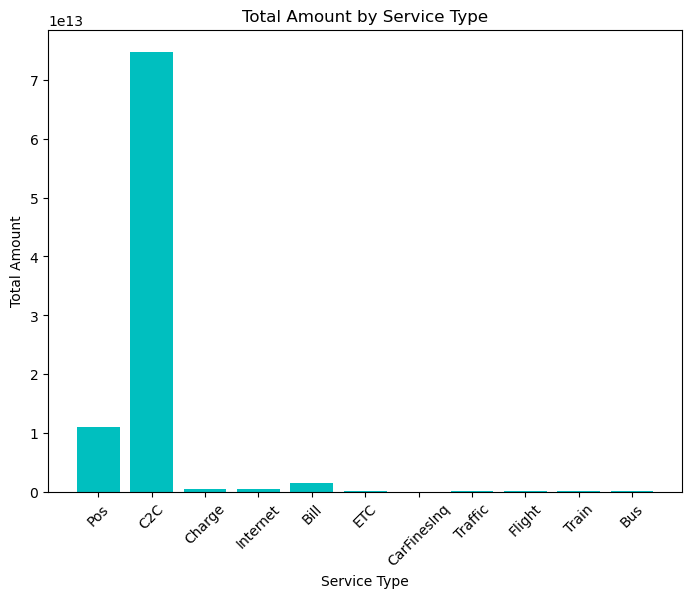

In [26]:
# List of columns for comparison
transaction_types = {
    'Pos': 'TotalAmountPos',
    'C2C': 'AmountC2C',
    'Charge': 'AmountCharge',
    'Internet': 'AmountInternet',
    'Bill': 'AmountBill',
    'ETC': 'AmountETC',
    'CarFinesInq': 'AmountCarFinesInq',
    'Traffic': 'AmountTraffic',
    'Flight': 'AmountDFlight',
    'Train': 'AmountTrain',
    'Bus': 'AmountBus',
}


# Visualization for Comparing Total Counts
plt.figure(figsize=(18, 6))

# Plot for all services
plt.subplot(1, 2, 1)
amounts = [df[col].sum() for col in transaction_types.values()]
plt.bar(transaction_types.keys(), amounts, color='c')
plt.xlabel('Service Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Service Type')
plt.xticks(rotation=45)
plt.show()

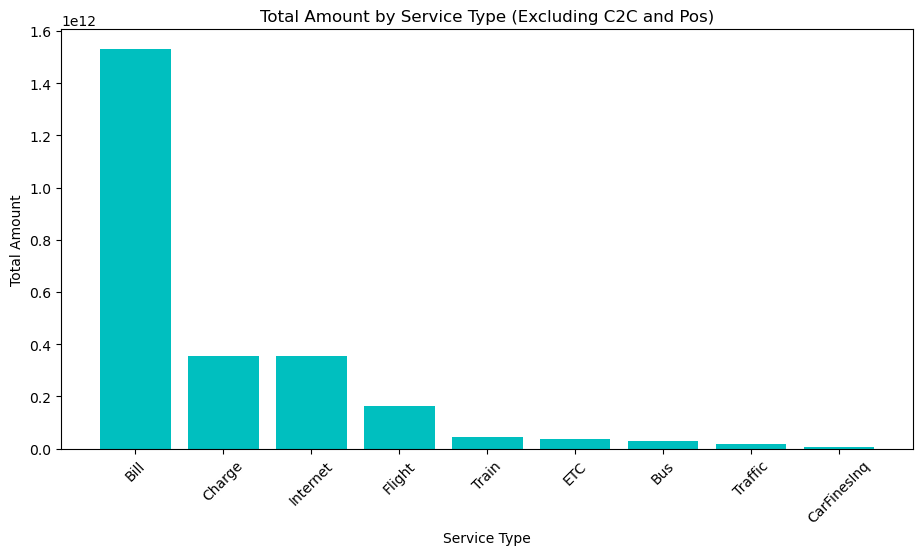

In [27]:
# Visualization for Comparing Amounts
plt.figure(figsize=(18, 10))

# Plot for all services excluding C2C and Pos
plt.subplot(2, 2, 1)
non_c2c_pos_types = {k: v for k, v in transaction_types.items() if k not in ['C2C', 'Pos']}
amounts_non_c2c_pos = [df[col].sum() for col in non_c2c_pos_types.values()]
sorted_indices = sorted(range(len(amounts_non_c2c_pos)), key=lambda k: amounts_non_c2c_pos[k], reverse=True)
sorted_non_c2c_pos_keys = [list(non_c2c_pos_types.keys())[i] for i in sorted_indices]
sorted_amounts_non_c2c_pos = [amounts_non_c2c_pos[i] for i in sorted_indices]

bars = plt.bar(sorted_non_c2c_pos_keys, sorted_amounts_non_c2c_pos, color='c')
plt.xlabel('Service Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Service Type (Excluding C2C and Pos)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Total Count Services

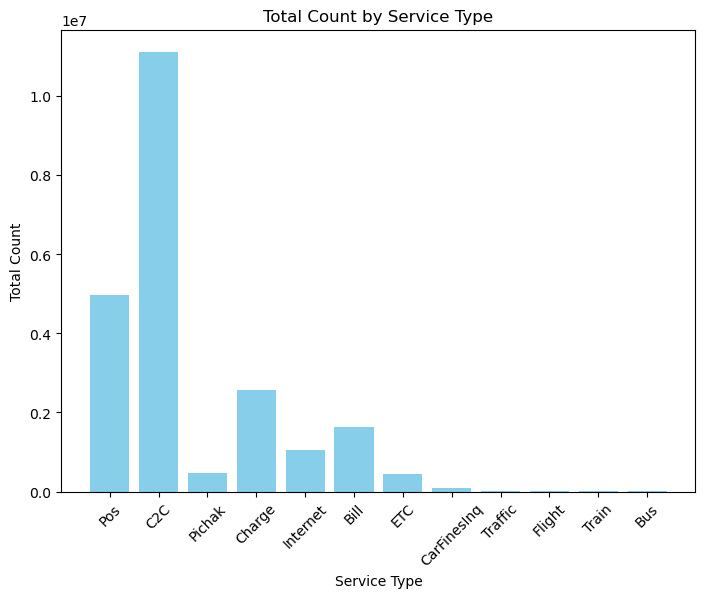

In [28]:
# List of columns for comparison
transaction_types = {
    'Pos': 'TotalTrsPos',
    'C2C': 'CountC2C',
    'Pichak': 'CountPichak',
    'Charge': 'CountCharge',
    'Internet': 'CountInternet',
    'Bill': 'CountBill',
    'ETC': 'CountETC',
    'CarFinesInq': 'CountCarFinesInq',
    'Traffic': 'CountTraffic',
    'Flight': 'CountDFlight',
    'Train': 'CountTrain',
    'Bus': 'CountBus',
}

# Visualization for Comparing Total Counts
plt.figure(figsize=(18, 6))

# Plot for all services
plt.subplot(1, 2, 1)
counts = [df[col].sum() for col in transaction_types.values()]
plt.bar(transaction_types.keys(), counts, color='skyblue')
plt.xlabel('Service Type')
plt.ylabel('Total Count')
plt.title('Total Count by Service Type')
plt.xticks(rotation=45)
plt.show()

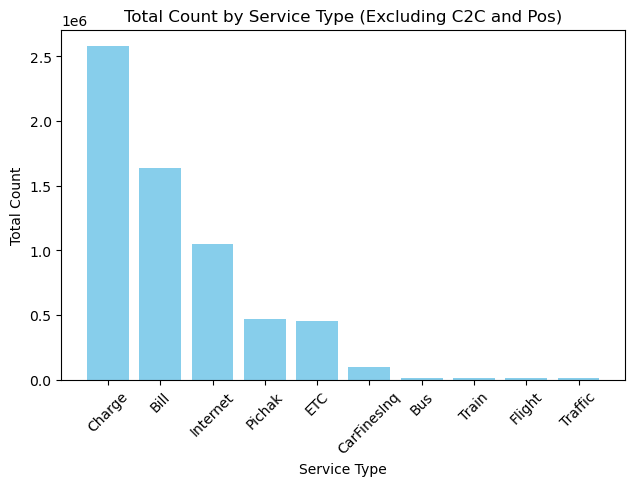

In [29]:
# Visualization for Comparing Total Counts
plt.figure(figsize=(16, 10))

# Plot for all services excluding C2C and Pos
plt.subplot(2, 2, 1)
non_c2c_pos_types = {k: v for k, v in transaction_types.items() if k not in ['C2C', 'Pos']}
counts_non_c2c_pos = [df[col].sum() for col in non_c2c_pos_types.values()]
sorted_indices = sorted(range(len(counts_non_c2c_pos)), key=lambda k: counts_non_c2c_pos[k], reverse=True)
sorted_non_c2c_pos_keys = [list(non_c2c_pos_types.keys())[i] for i in sorted_indices]
sorted_counts_non_c2c_pos = [counts_non_c2c_pos[i] for i in sorted_indices]

bars = plt.bar(sorted_non_c2c_pos_keys, sorted_counts_non_c2c_pos, color='skyblue')
plt.xlabel('Service Type')
plt.ylabel('Total Count')
plt.title('Total Count by Service Type (Excluding C2C and Pos)')
plt.xticks(rotation=45)
plt.show()

## 3. Banks

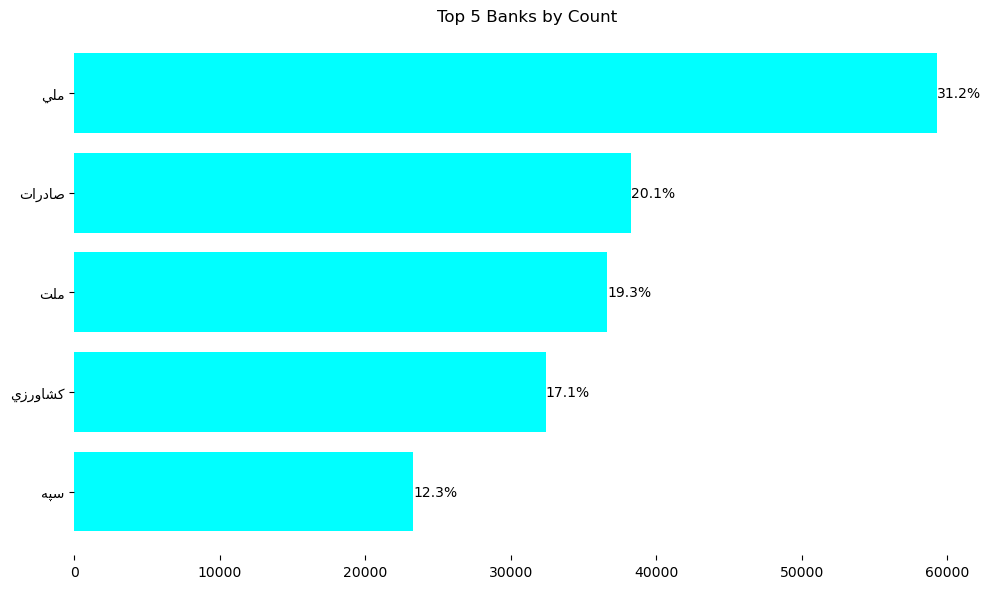

In [48]:
# Split comma-separated values and expand to DataFrame
exploded = df['UserOwnedBanks'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['bank', 'count']

# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(5)

# Reshape and reorder the text for proper display
top_10_counts['bank'] = top_10_counts['bank'].apply(lambda x: get_display(arabic_reshaper.reshape(x.strip())))

colors = ['orange', 'skyblue', 'salmon', 'lightgreen', 'lightblue', 'pink', 'wheat', 'violet', 'royalblue', 'hotpink']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_counts['bank'], top_10_counts['count'], color='aqua')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 5 Banks by Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add percentage labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width / sum(top_10_counts["count"]) * 100:.1f}%', 
             ha='left', va='center', color='black')

plt.show()

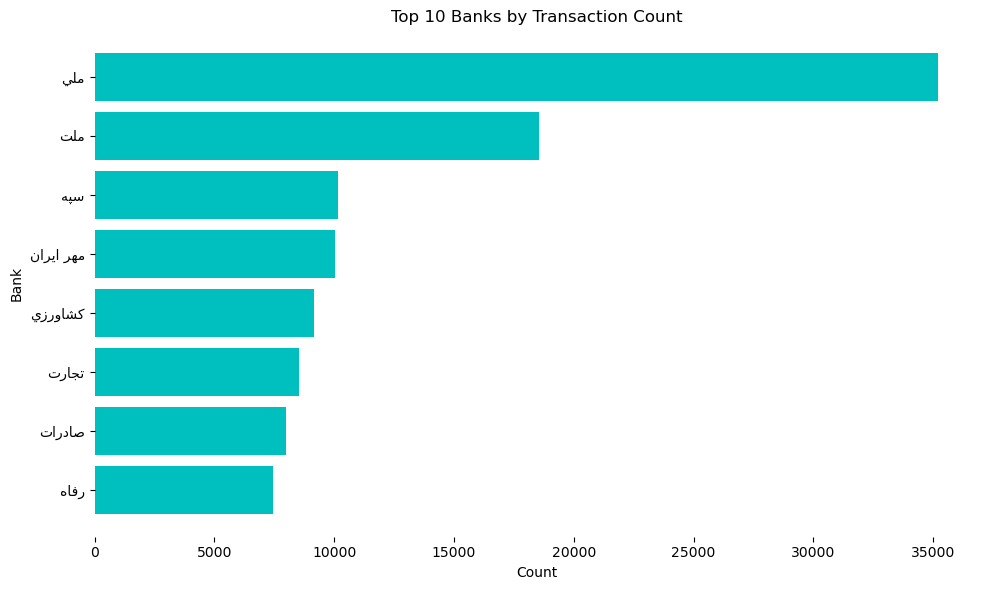

In [53]:
# Split comma-separated values and expand to DataFrame
exploded = df['BankswithTrs'].str.split(',', expand=True)

# Count occurrences of each unique value
value_counts = exploded.stack().value_counts().reset_index(name='count')
value_counts.columns = ['bank', 'count']

# Remove leading and trailing whitespace characters from the bank names
value_counts['bank'] = value_counts['bank'].str.strip()

# Sort by count in descending order (top 10)
top_10_counts = value_counts.sort_values(by='count', ascending=False).head(10)

# Use bidi and arabic_reshaper for proper display
top_10_counts['bank'] = top_10_counts['bank'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_counts['bank'], top_10_counts['count'], color='c')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.title('Top 10 Banks by Transaction Count')
plt.gca().invert_yaxis()  # Invert y-axis to display the top bank at the top

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

## 4. Mobile Application Download Sources

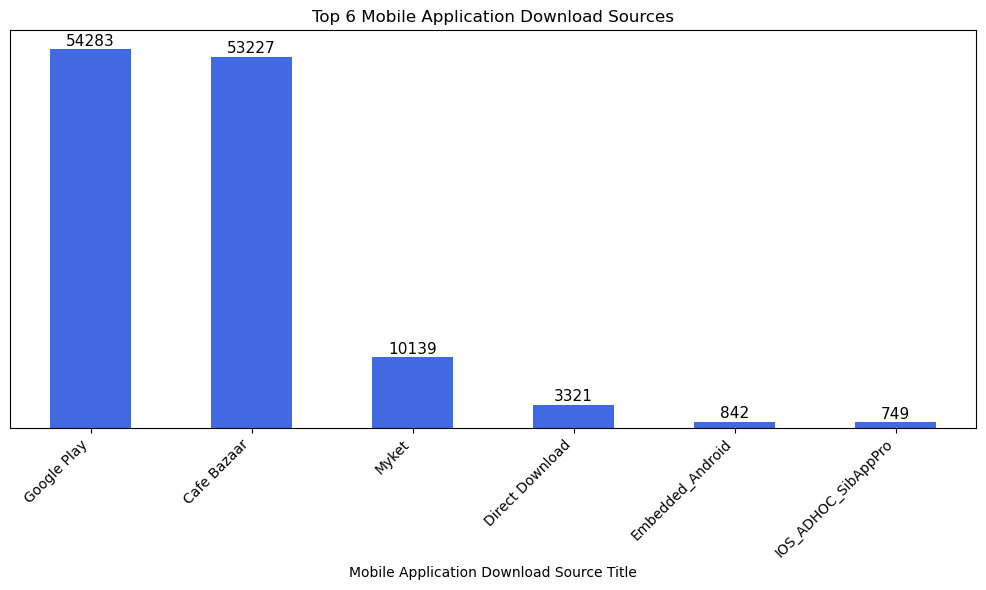

In [32]:
# Filter data for Mobile Operator Id 1 and 2
df_filtered = df[df['Mobile Operator Id'].isin([1, 2])]

# Get the top 6 application download source
top_6_downloads = (df_filtered['Mobile Application Download Source Title']
                    .dropna()
                    .value_counts()
                    .head(6))

# Create the first chart
plt.figure(figsize=(10, 6))
bars = top_6_downloads.plot(kind='bar', color='royalblue')

# Remove grid lines and y-axis labels
plt.grid(axis='y', linestyle='none', which='both', markevery=None)
plt.ylabel('')
plt.yticks([])  # Remove y-axis numbers

# Annotate bar values inside the bars
for bar in bars.patches:
    bar.set_height(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, int(bar.get_height()), ha='center', va='bottom', fontsize=11)

# Set x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mobile Application Download Source Title')
plt.title('Top 6 Mobile Application Download Sources')

plt.tight_layout()
plt.show()

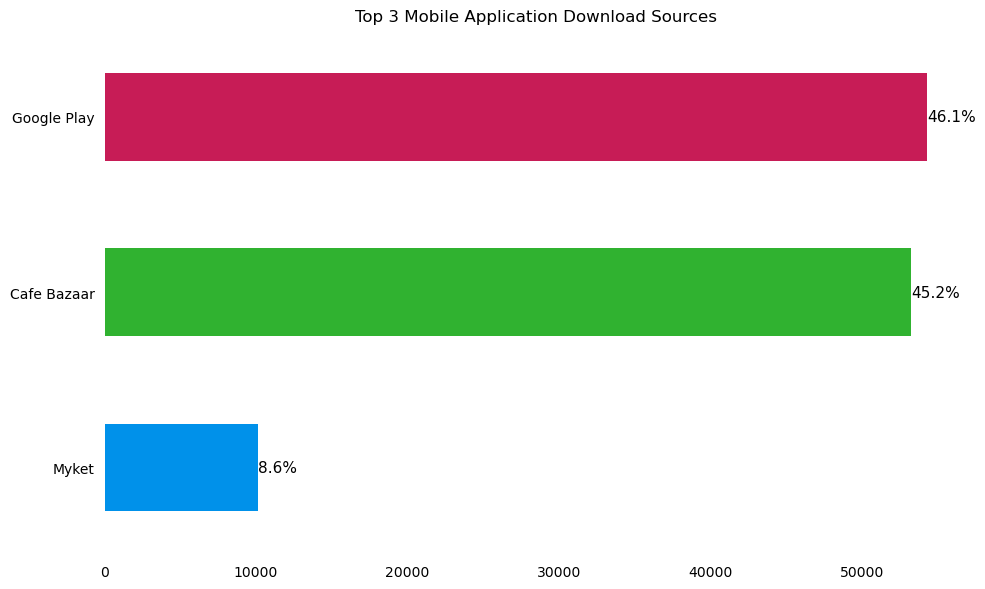

In [33]:
# Get the top 3 application download source
top_3_downloads = (df_filtered['Mobile Application Download Source Title']
                    .dropna()
                    .value_counts()
                    .head(3)
                    .sort_values())

# Define custom colors for each bar
colors = ['#0091EA', '#30B230', '#c71c56']

# Create the chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Plot horizontal bars with custom colors
bars = top_3_downloads.plot(kind='barh', color=colors, ax=ax)

# Remove y-axis labels
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Annotate bar percentages inside the bars
for i, bar in enumerate(bars.patches):
    bar_width = bar.get_width()
    bar_center = bar.get_y() + bar.get_height() / 2
    ax.text(bar_width + 5, bar_center, f'{bar_width/sum(top_3_downloads)*100:.1f}%', va='center', fontsize=11, color='#000')

# Set y-axis labels and title
ax.set_ylabel('')
plt.title('Top 3 Mobile Application Download Sources')

plt.tight_layout()
plt.show()

## 5. Mobile Operator Id

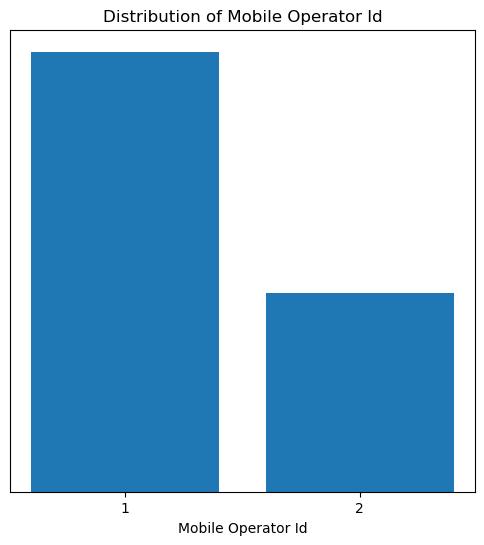

In [34]:
# 2. Mobile Operator Id distribution (with labels 1 and 2)
operator_counts = df['Mobile Operator Id'].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(operator_counts.index, operator_counts.values)  # Use bar chart for clear x-axis labels

# Set custom x-axis labels
plt.xticks(operator_counts.index, [str(x) for x in operator_counts.index])  # Convert index to strings

plt.xlabel('Mobile Operator Id')
plt.ylabel('')  # Remove y-axis labels
plt.yticks([])  # Remove y-axis numbers
plt.title('Distribution of Mobile Operator Id')
plt.grid(axis='y', linestyle='none', which='both', markevery=None)
plt.show()

## 6. Mobile Device OS

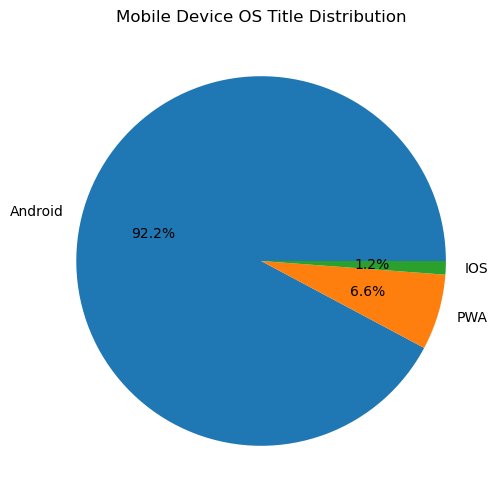

In [35]:
# 3. Mobile Device OS Title (Count)
os_counts = df['Mobile Device OS Title'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(os_counts, labels=os_counts.index, autopct="%1.1f%%")
plt.title("Mobile Device OS Title Distribution")
plt.show()

### 7. Region

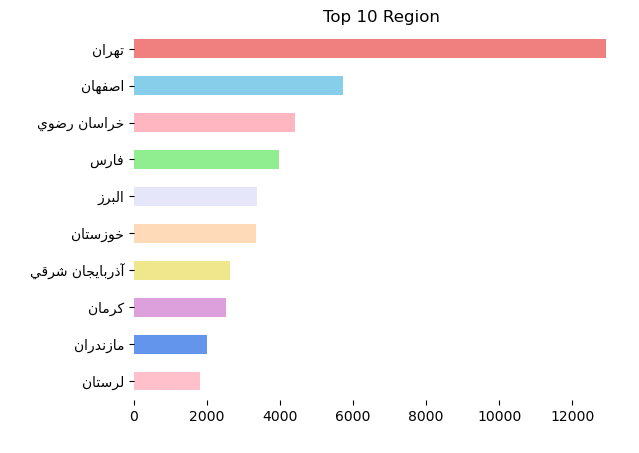

In [56]:
# Assuming df is your DataFrame and it has a column 'FirstProvince'
province_count = df['FirstProvince'].value_counts().head(10)

# Reshape the Arabic text for proper display
reshaped_provinces = [get_display(arabic_reshaper.reshape(x)) for x in province_count.index]

colors = ['lightcoral', 'skyblue', 'lightpink', 'lightgreen', 'lavender', 'peachpuff', 'khaki', 'plum', 'cornflowerblue', 'pink']


# Plotting
province_count.plot(kind='barh', color=colors)  
plt.xlabel(' ')  
plt.ylabel(' ')  
plt.title('Top 10 Region')
plt.yticks(range(len(reshaped_provinces)), reshaped_provinces) 

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)


plt.gca().invert_yaxis()

plt.show()

In [ ]:
# Save to an Excel file
df.to_excel('User Segmentation.xlsx', index=False)